In [86]:
%matplotlib inline
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [375]:
CloudTop = np.load("X_train_CI20.npy")
TrueColor = np.load("Y_train_CI20.npy")
TrueColor.shape, CloudTop.shape

((8423, 127, 127, 3), (8423, 127, 127, 3))

Text(0.5, 1.0, 'Visible RGB')

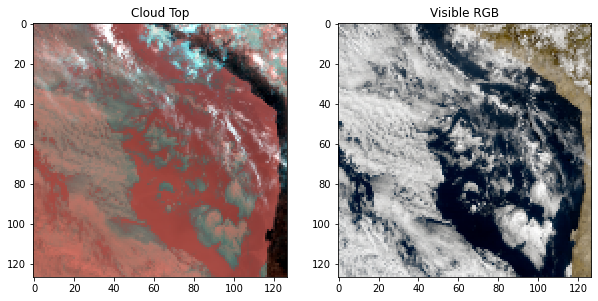

In [376]:
randindex=np.random.randint(0,TrueColor.shape[0]) #nice image at randindex = 5846
randindex=13
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(array_to_img(CloudTop[randindex,:,:,:]))
plt.title('Cloud Top')

plt.subplot(1,2,2)
plt.imshow(array_to_img(TrueColor[randindex,:,:,:]))
plt.title('Visible RGB')

In [377]:
TrueColor[randindex,0,5]

array([144., 144., 144.], dtype=float32)

In [378]:
#data preprocessing
#how much of the data do we filter out?
np.sum(np.count_nonzero(TrueColor,axis=(1,2,3))<1000)/np.shape(TrueColor)[0]

0.483319482369702

In [379]:
np.sum(TrueColor, axis=(1,2,3))
mask=np.count_nonzero(TrueColor,axis=(1,2,3))<1000
indices=np.where(mask==True)

In [380]:
TrueColorNZ = np.delete(TrueColor,indices,0)
CloudTopNZ = np.delete(CloudTop,indices,0)

In [381]:
num_good_im=np.shape(CloudTopNZ)[0]
print(num_good_im)

4352


In [382]:
#I think kmeans works only with single pixels, so transform to a long array
TrueColorNZ_resh=TrueColorNZ.reshape(num_good_im*127*127,3)

In [385]:
#select how many of the images to use and to label
num_im=num_good_im
end=127*127*num_im
#restrict the fitting data (only to explore, later always use all data)
Fit=TrueColorNZ_resh[0:end,:]
np.shape(Fit)

(70193408, 3)

In [265]:
#k-means 
from sklearn.cluster import KMeans
#initialize cluster means at cloud-off-white, land-bown and ocean-dark-blue
clouds, undecided, ocean=[176., 175., 174.], [130., 115.,  0.],[ 0.,  0., 12.]
in_means = np.array([clouds, undecided, ocean])
kmeans = KMeans(n_clusters=3, init=in_means).fit(Fit)
kmeans.cluster_centers_

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([[168.70625 , 169.42728 , 169.27295 ],
       [107.61057 , 105.62459 ,  99.02057 ],
       [ 17.005768,  21.928345,  27.775494]], dtype=float32)

In [328]:
np.shape(TrueColorNZ_resh)

(70193408, 3)

In [268]:
pic=kmeans.labels_.reshape(num_im,127,127)

Text(0.5, 1.0, 'Visible RGB')

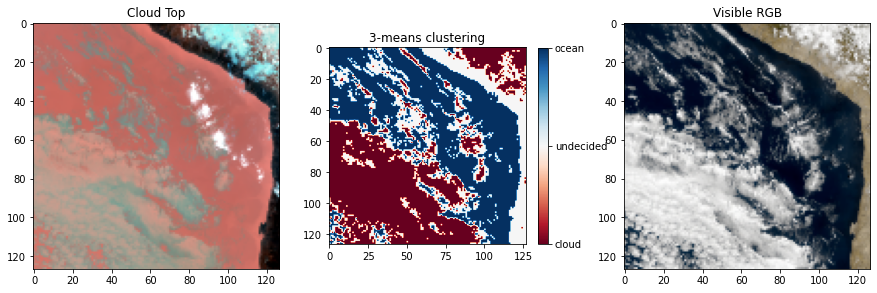

In [386]:
#which image to plot (must be smaller than num_im)
image_ind=486

#plot the three figures
plt.figure(figsize=(15,45))

plt.subplot(1,3,1)
plt.imshow(array_to_img(CloudTopNZ[image_ind,:,:,:]))
plt.title('Cloud Top')

plt.subplot(1,3,2)
plt.imshow(pic[image_ind,:,:], cmap='RdBu')
plt.title('3-means clustering')
cbar=plt.colorbar(shrink=0.08, ticks=[0,1,2])
# which label corresponds to which physical description can change based on the 
# random seed in the k-means algorithm, so this is not always the right labelling
cbar.ax.set_yticklabels(['cloud','undecided','ocean'])

plt.subplot(1,3,3)
plt.imshow(array_to_img(TrueColorNZ[image_ind,:,:,:]))
plt.title('Visible RGB')
#plt.savefig("k-means.png", dpi=300)
